# **SARP-East Coding Lesson 6 - Grouby and `.where()` in Xarray**
09 July 2024
<br>Riley McCue

This lesson is based off of one on the [SARP Programming website](https://nasa-sarp.github.io/sarp_lessons/index.html) and some  on [xarray.dev](https://tutorial.xarray.dev/fundamentals/03.2_groupby_with_xarray.html).

##  💻😺*"I'm not a great programmer; I'm just a good programmer with great habits."* 😺💻
<br>- Kent Beck

# 🏊🏻‍♀️🏊🏻‍♀️🏊🏻‍♀️🏊🏻‍♀️ **Practice Time** 🏊🏻‍♀️🏊🏻‍♀️🏊🏻‍♀️🏊🏻‍♀️

We are going to be working with real data today, so let's get our data!

Go to [GitHub](https://github.com/NASA-SARP/sarp_lessons/blob/main/lessons/gridded_data/data/oisst-avhrr-v02r01.20220304.nc).

In [1]:
#Imports xarray libary
import xarray as xr

In [2]:
#Opens data as a dataset, and removes the zlev dimension.
ds = xr.open_dataset('./Data_Images/oisst-avhrr-v02r01.20220304.nc')
da_sst = ds.sst.squeeze(dim='zlev', drop=True)

In [3]:
#Views the DataArray
da_sst

<xarray.DataArray 'sst' (time: 1, lat: 720, lon: 1440)> Size: 4MB
[1036800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-03-04T12:00:00
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Attributes:
    long_name:  Daily sea surface temperature
    units:      Celsius
    valid_min:  -300
    valid_max:  4500

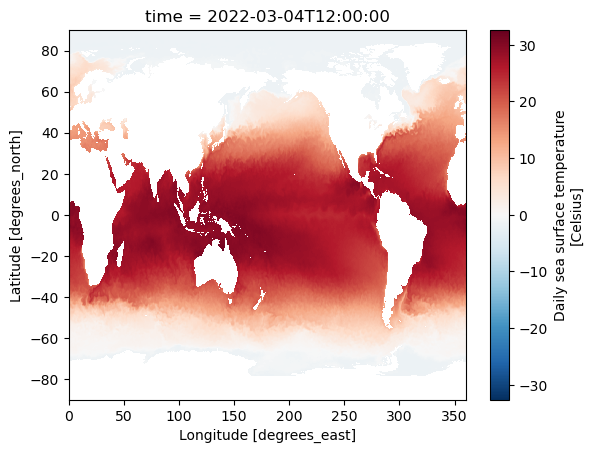

In [4]:
#Plots the DataArray
da_sst.plot()

# **Computations**
We can apply operators to our DataArrays and Datasets just as we could our DataFrames.

## Arithmetic
Let's convert our Celsius temperatures to Kelvin.

In [5]:
da_kelvin = da_sst + 273
da_kelvin

<xarray.DataArray 'sst' (time: 1, lat: 720, lon: 1440)> Size: 4MB
array([[[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [271.27, 271.26, 271.25, ..., 271.24, 271.25, 271.27],
        [271.26, 271.23, 271.22, ..., 271.22, 271.23, 271.26],
        [271.2 , 271.2 , 271.2 , ..., 271.2 , 271.2 , 271.2 ]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-03-04T12:00:00
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9

This works because of a thing called broadcasting.
:::{admonition} 🌀 More Info: Broadcasting during arithmetic
:class: note, dropdown

The reason that this works is because numpy (and therefore xarray) uses a technique called **broadcasting**. You can read more about it [HERE](https://tutorial.xarray.dev/workshops/online-tutorial-series/03_computation.html#broadcasting).

:::

## Aggregations
We can apply this aggregations right to our DataArrays.

In [6]:
da_sst.min()

<xarray.DataArray 'sst' ()> Size: 4B
array(-1.8, dtype=float32)

We can also apply these aggregations along a dimension or axis.

In [7]:
#Finds the maximum of the second index dimension -- longitude
da_sst.max(axis=2)

<xarray.DataArray 'sst' (time: 1, lat: 720)> Size: 3kB
array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan, -1.02      , -1.09      , -1.04      , -1.05      ,
        -0.89      , -0.78      , -0.84      , -0.77      , -0.76      ,
        -0.63      , -0.58      , -0.56      , -0.47      , -0.5       ,
        -0.53      , -0.09      , -0.09999999, -0.05      , -0.28      ,
        -0.25      , -0.32      ,  0.17999999,  0.24      ,  0.26999998,
        -0.09      ,  0.09      ,  0.05      , -0.06      , -0.17999999,
        -0.14      ,  0.08      ,  0.14999999,  0.17      ,  0.19999999,
         0.19999999,  0.16      ,  0.25      ,  0.39999998,  0.48      ,
         0.62      ,  0.63      ,  0.84      ,  1.01      ,  1.03      ,
         1.0699999 ,  1.28      ,  1.35      ,  1.29      ,  1.27      ,
         1.38      ,  1.56      ,  1.78      ,  1.8299999 ,  1.9599999 ,
...
         7.7799997 ,  7.64      ,  7.41      ,  7.27      ,  7.06      ,
         6.93      ,  6.91      ,  6.77      ,  6.69      ,  6.91      ,
         6.99      ,  6.8799996 ,  6.6       ,  6.6299996 ,  6.69      ,
         6.6099997 ,  6.5299997 ,  6.48      ,  6.31      ,  6.25      ,
         6.19      ,  6.0899997 ,  6.        ,  5.97      ,  6.0299997 ,
         6.08      ,  6.04      ,  5.95      ,  5.9       ,  5.93      ,
         5.95      ,  5.7599998 ,  5.83      ,  5.7799997 ,  5.6299996 ,
         5.3199997 ,  4.72      ,  4.7799997 ,  5.42      ,  5.7999997 ,
         5.0699997 ,  4.19      ,  4.06      ,  4.04      ,  4.2599998 ,
         4.41      ,  3.83      ,  3.05      ,  3.4299998 ,  3.3899999 ,
         3.1       ,  2.73      ,  1.93      ,  0.65      , -0.84999996,
        -1.35      , -1.3199999 , -1.37      , -1.4       , -0.71999997,
        -1.28      , -1.35      , -1.06      , -1.01      , -1.12      ,
        -1.3299999 , -1.4399999 , -1.3199999 , -1.41      , -1.55      ,
        -1.5999999 , -1.5899999 , -1.5899999 , -1.5999999 , -1.5999999 ,
        -1.5999999 , -1.61      , -1.61      , -1.62      , -1.62      ,
        -1.62      , -1.61      , -1.62      , -1.5899999 , -1.56      ,
        -1.56      , -1.5799999 , -1.61      , -1.62      , -1.5999999 ,
        -1.5999999 , -1.5999999 , -1.5799999 , -1.49      , -0.85999995]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-03-04T12:00:00
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88

In [8]:
#Finds the max along the dimension latitude
da_sst.max(dim='lat')

<xarray.DataArray 'sst' (time: 1, lon: 1440)> Size: 6kB
array([[29.869999, 29.89    , 29.92    , ..., 29.76    , 29.81    ,
        29.84    ]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-03-04T12:00:00
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9

:::{admonition} Want to explore some more independent learning?
:class: dropdown

Look at [the documentation page](https://xarray.pydata.org/en/v2024.06.0/generated/xarray.DataArray.std.html) for the `.std()` function in xarray and [the documentation page](https://numpy.org/doc/stable/reference/generated/numpy.std.html) for `.std()` in numpy.

- What does the function do? (Use the numpy page)
- Name 1 argument to the function and describe what it does.
- What type of object does the function return?

## Booleans - Filtering and Masking
We can use the same comparisons (>, <, ==, >=, <=), and it compares every value in the DataArray. The output is an array of the same size where each value is a boolean True/False telling us if the condition was true.

In [9]:
# Where sst is greater than 15
da_sst > 15

<xarray.DataArray 'sst' (time: 1, lat: 720, lon: 1440)> Size: 1MB
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-03-04T12:00:00
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9

In [10]:
# Where sst is greater than 15 and less than 20
(da_sst > 15) & (da_sst < 20)

<xarray.DataArray 'sst' (time: 1, lat: 720, lon: 1440)> Size: 1MB
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-03-04T12:00:00
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9

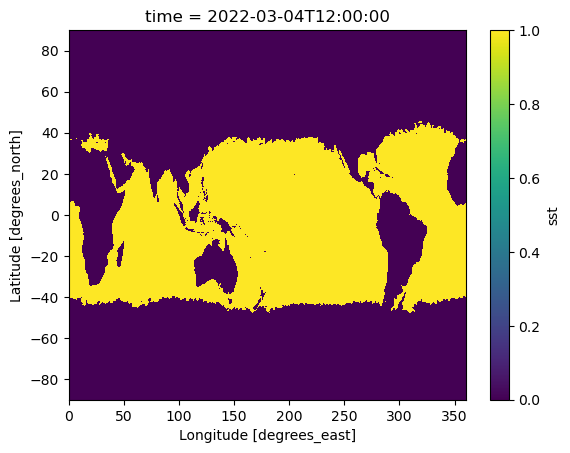

In [11]:
#Where sst is greater than 15 at one specific time
(da_sst > 15).isel(time=0).plot()

## **`.where()` -- Another way of Masking**

Another common kind of data manipulation is to want to give data cells new values based on their old values. For that we will use [`.where()`](https://xarray.pydata.org/en/stable/generated/xarray.where.html).

`.where()` takes at least three arguments:

> `.where(condition, true, false)`

- `condition` should be any type of boolean statement like above that returns a bunch of True/False
- `true` is what xarray should put into any place that has a True value.
- `false` is what xarray should put into any place that has a False value.

Let's practice looking at some [documentation](https://docs.xarray.dev/en/stable/generated/xarray.where.html).

In the following example, we will put the word "warm" anywhere `sst` is greater than 20, and put "cold" everywhere else.

In [12]:
#Condition = da_sst>20, True = warm', False = 'cold'
xr.where(da_sst > 20, "warm", "cold")

<xarray.DataArray 'sst' (time: 1, lat: 720, lon: 1440)> Size: 17MB
array([[['cold', 'cold', 'cold', ..., 'cold', 'cold', 'cold'],
        ['cold', 'cold', 'cold', ..., 'cold', 'cold', 'cold'],
        ['cold', 'cold', 'cold', ..., 'cold', 'cold', 'cold'],
        ...,
        ['cold', 'cold', 'cold', ..., 'cold', 'cold', 'cold'],
        ['cold', 'cold', 'cold', ..., 'cold', 'cold', 'cold'],
        ['cold', 'cold', 'cold', ..., 'cold', 'cold', 'cold']]],
      dtype='<U4')
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-03-04T12:00:00
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9

We can use `.where()` to replace missing or NaN values with a placeholder. 

In [13]:
# Let's replace the missing values (nan) with some placeholder
da_sst.where(da_sst.notnull(), -9999)

<xarray.DataArray 'sst' (time: 1, lat: 720, lon: 1440)> Size: 4MB
array([[[-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        [-9.999e+03, -9.999e+03, -9.999e+03, ..., -9.999e+03,
         -9.999e+03, -9.999e+03],
        ...,
        [-1.730e+00, -1.740e+00, -1.750e+00, ..., -1.760e+00,
         -1.750e+00, -1.730e+00],
        [-1.740e+00, -1.770e+00, -1.780e+00, ..., -1.780e+00,
         -1.770e+00, -1.740e+00],
        [-1.800e+00, -1.800e+00, -1.800e+00, ..., -1.800e+00,
         -1.800e+00, -1.800e+00]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-03-04T12:00:00
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Attributes:
    long_name:  Daily sea surface temperature
    units:      Celsius
    valid_min:  -300
    valid_max:  4500

The conditional doesn't have to be data from the original dataset. It could be one of its coordinates, an operator output, or any data structure that is the same shape.

In [14]:
#Replaces all values with a latitude less than 0 with 0
xr.where(da_sst.lat < 0, 0, da_sst)

<xarray.DataArray (lat: 720, time: 1, lon: 1440)> Size: 4MB
array([[[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]],

       [[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]],

       [[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]],

       ...,

       [[-1.73, -1.74, -1.75, ..., -1.76, -1.75, -1.73]],

       [[-1.74, -1.77, -1.78, ..., -1.78, -1.77, -1.74]],

       [[-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * time     (time) datetime64[ns] 8B 2022-03-04T12:00:00
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9

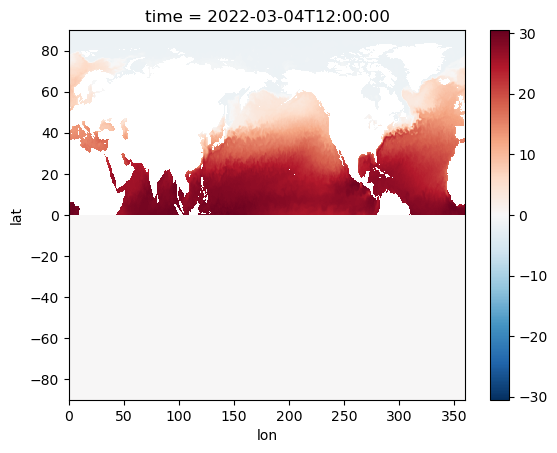

In [15]:
#Plots this output at the first time value
xr.where(da_sst.lat < 0, 0, da_sst).isel(time=0).plot()

We masked our data to only view the northern hemisphere!

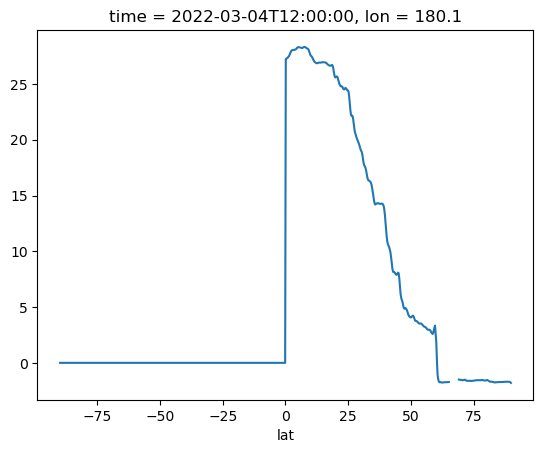

In [16]:
#We can view this at a specific longitude as well
xr.where(da_sst.lat < 0, 0, da_sst).isel(lon = 720).plot()

:::{admonition} If you would like to see how this can be applied to a whole Dataset...
:class: dropdown
Check out [this link](https://xarray.pydata.org/en/v2024.06.0/generated/xarray.Dataset.where.html).

# **Recap - Breaking `groupby` into conceptual parts**

In addition to the data structure, there are three main parts to a groupby:
1. Which variable we want to group together --> which GROUP are we choosing
2. How we want to group --> what are we doing with this group (AGGREGATION)
3. The variable we want to see in the end --> which variable is of INTEREST

<img src="https://static.packt-cdn.com/products/9781783985128/graphics/5128OS_09_01.jpg" width=550>

Now, we have our data open! Let's look to how we can group this data.

## `groupby` syntax
Pandas: `DATAFRAME.groupby(GROUP).AGGREGATION()`

Xarray: `DATAARRAY.groupby(GROUP).AGGREGATION()`

You can do `grouby` to a whole Dataset, but we are going to focus on applying it to DataArrays today.

Let's walk through an example.

In physical oceanography, it is common to group by latitude, so that you can see how a variable changes as you move closer to or further away from the equator.

In [17]:
#Group = 'lat', Aggregation = .mean()
da_sst.groupby('lat').mean(...)

<xarray.DataArray 'sst' (lat: 720)> Size: 3kB
array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan, -1.60576046e+00, -1.60936546e+00,
       -1.59555566e+00, -1.56879246e+00, -1.53598309e+00, -1.50997424e+00,
       -1.49665809e+00, -1.47572494e+00, -1.44060051e+00, -1.40049088e+00,
       -1.37327409e+00, -1.34686565e+00, -1.33067799e+00, -1.33130527e+00,
       -1.30808103e+00, -1.27450466e+00, -1.23564434e+00, -1.22612131e+00,
       -1.22652256e+00, -1.21986067e+00, -1.21165812e+00, -1.20017111e+00,
       -1.18722475e+00, -1.18862677e+00, -1.21300006e+00, -1.22864580e+00,
       -1.25179815e+00, -1.24926305e+00, -1.23627639e+00, -1.21719289e+00,
       -1.18193030e+00, -1.15649354e+00, -1.12543058e+00, -1.08391201e+00,
...
        8.32177177e-02,  6.03024196e-03, -9.51826796e-02, -1.70496583e-01,
       -2.35420346e-01, -2.81060576e-01, -3.25153381e-01, -3.84170085e-01,
       -4.37258244e-01, -4.73952591e-01, -5.23441374e-01, -6.37329757e-01,
       -7.34746277e-01, -8.06852520e-01, -8.51410925e-01, -8.92525196e-01,
       -9.19440627e-01, -9.83572781e-01, -1.04641449e+00, -1.09051371e+00,
       -1.15335429e+00, -1.21488237e+00, -1.27574742e+00, -1.31679618e+00,
       -1.36032736e+00, -1.38394511e+00, -1.41072977e+00, -1.43635023e+00,
       -1.44863868e+00, -1.46660542e+00, -1.50196159e+00, -1.53681326e+00,
       -1.57403004e+00, -1.60348356e+00, -1.63291144e+00, -1.65726089e+00,
       -1.66841388e+00, -1.67372549e+00, -1.68312669e+00, -1.69431031e+00,
       -1.70083845e+00, -1.71191299e+00, -1.71884120e+00, -1.72075558e+00,
       -1.71685088e+00, -1.71835732e+00, -1.72196531e+00, -1.72431719e+00,
       -1.72588181e+00, -1.72574699e+00, -1.72516668e+00, -1.72440946e+00,
       -1.72136796e+00, -1.71859705e+00, -1.71676385e+00, -1.71635401e+00,
       -1.71670127e+00, -1.71668041e+00, -1.71719444e+00, -1.71887493e+00,
       -1.72009718e+00, -1.72070122e+00, -1.71927083e+00, -1.71474290e+00,
       -1.70872223e+00, -1.70366669e+00, -1.70378482e+00, -1.70760417e+00,
       -1.71209729e+00, -1.71631944e+00, -1.71732640e+00, -1.71518052e+00,
       -1.71087492e+00, -1.70659029e+00, -1.70940280e+00, -1.67388904e+00],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
Attributes:
    long_name:  Daily sea surface temperature
    units:      Celsius
    valid_min:  -300
    valid_max:  4500

Notice the output is a `DataArray`.

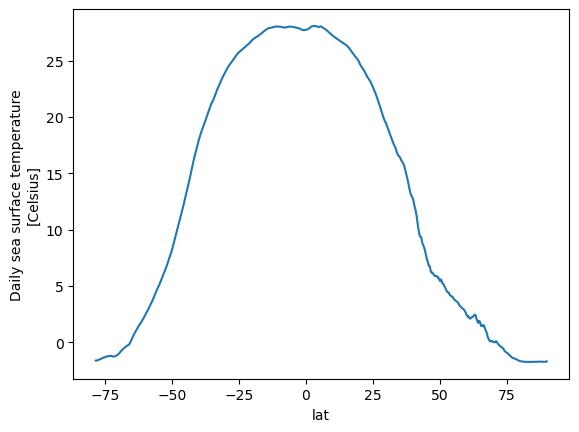

In [18]:
#Plots this groupby
da_sst.groupby('lat').mean(...).plot()

What do we see? Hot water near the equator and chilly water near the poles.

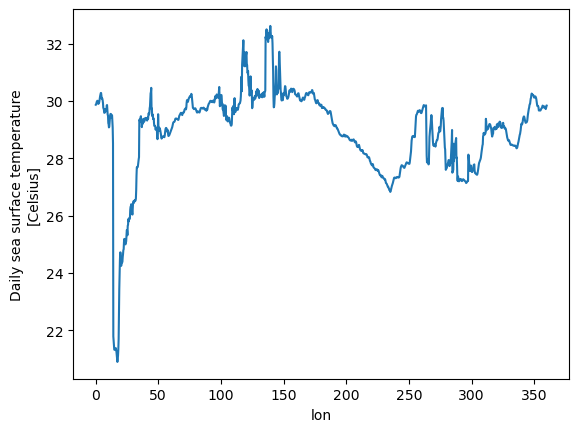

In [24]:
ds.sst.groupby('lon').max(...).plot()

:::{note}
The ellipses ... inside the .mean() tell xarray to take the mean over all of the remaining axis. This isn't necessary -- you may instead want to take the mean over just the latitude and keep the time resolution -- but for our purposes here to view the time series it is necessary. It’s quite common to aggregate over all remaining axis.

You can apply this same method and apply many different aggregations to groupings. 
<br> Common aggregations are similar to those we saw in pandas --> mean, max, min, count, sum, std, ...

For more on `.groupby()` in xarray, checkout [this lesson](https://tutorial.xarray.dev/fundamentals/03.2_groupby_with_xarray.html). If you are working with a DataArray with many coordinates in the time dimension, this lesson shows you a lot of cool tricks with grouping your time data with tools like `.month` and `.year`.

# `groupby` vs `.where()`
Grouby -- takes your data structure and splits it based on a group, applies an aggregation, and combines it back together at the end. The output of your groupby may very likely be a different shape than your originial data structure.

Where -- takes the given condition and skims your data, and rewrites the data as necessary based on the conditions. The output is always the same shape as your orignial data structure. 

# 🏊🏻‍♀️🏊🏻‍♀️🏊🏻‍♀️🏊🏻‍♀️ **Practice Time** 🏊🏻‍♀️🏊🏻‍♀️🏊🏻‍♀️🏊🏻‍♀️

# 🏁 Wrap-up: Think & Pair!
## Think!
Take 4 minutes and review on your own what you learned. Write down at least 2 things.
## Pair!
Take 4 minutes and discuss with your partner what you each learned today.